A python simulator illustrating downsampling on single cell gene expression data.

In [131]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
pcr_probs = [0.3, 0.5, 0.2]
def pcr(n):
    return np.random.choice([1,2,4], n, p = pcr_probs).sum()

In [177]:
n_cells = 100
base_cell_size = 20
u = 2
sampling_rate = 0.2

def sample(n_cells, 
           base_cell_size, 
           u, 
           sampling_rate, 
           do_log = True,
           do_pcr = True):
    cell_sizes = np.random.gamma(base_cell_size,1, n_cells).astype(np.int)
    
    expressions = np.random.poisson(u, n_cells)
    
    samples = (cell_sizes*sampling_rate).astype(np.int)
    
    pink = np.random.hypergeometric(expressions, 
                                            cell_sizes - expressions, 
                                            samples)
    grey = samples - pink
    
    if do_pcr:
        pink = np.array([pcr(n) for n in pink])
        grey = np.array([pcr(n) for n in grey])

    pink = pink/(pink + grey)*base_cell_size
    if do_log:
        pink = np.log1p(pink)
    return pink

In [178]:
def plot_sample(sample, ground_truth):
    df = pd.DataFrame({'sample': sample, 'ground_truth': ground_truth})
    fig, ax = plt.subplots()

    sns.distplot(df['ground_truth'], color='#F768A1', ax=ax, 
                 label='Ground Truth', kde_kws={"shade": False, 'alpha': 0.4, 'linestyle': '--', 'clip': (-0.1, df['ground_truth'].max())},
                 rug = False, hist = False)
    sns.distplot(df['sample'], color='#F768A1', ax=ax, 
                 label='Sample', kde_kws={"shade": True, 'alpha': 0.7, 'zorder': 10, 'clip':(-0.1,df['sample'].max())},
                 rug=True, rug_kws={'color': "#AE017E", 'alpha': 1},hist=False)
    ylims = ax.get_ylim()
    ax.plot([df['sample'].mean(), df['sample'].mean()], ylims, c = "#AE017E", linestyle='-')
    ax.plot([df['ground_truth'].mean(), df['ground_truth'].mean()], ylims, c = "#F768A1", linestyle='--')
    ax.set_xlabel('Gene expression')
    ax.set_ylabel('Density')
    ax.set_xlim(0,)
    return ax

In [179]:
def simulate(do_log, do_pcr):
    ax = plot_sample(sample(n_cells, base_cell_size, u, sampling_rate,
                                  do_log = do_log, do_pcr = do_pcr),
                sample(n_cells, base_cell_size, u, 1,
                                  do_log = do_log, do_pcr = do_pcr))
    ax.set_title(f'Log: {do_log}, PCR: {do_pcr}')

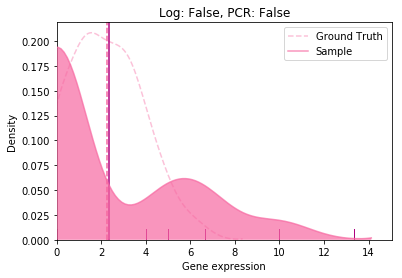

In [208]:
simulate(False, False)

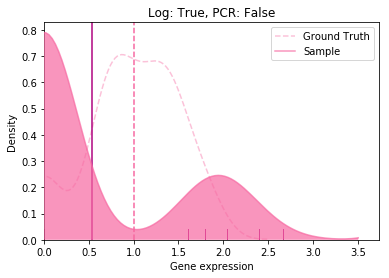

In [209]:
simulate(True, False)

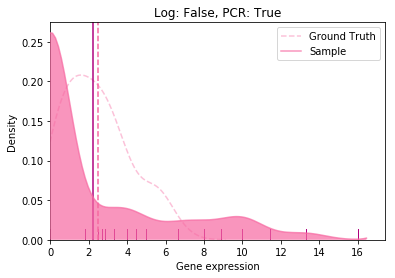

In [210]:
simulate(False, True)

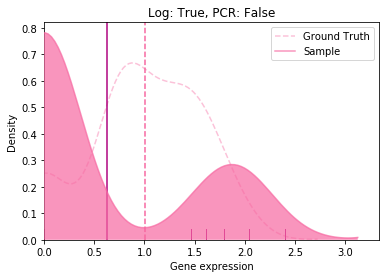

In [211]:
simulate(True, False)